In [1]:
from PIL import Image
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

In [2]:
img = Image.open("eye.png").convert("L").resize((4, 4))
img_array = np.array(img)

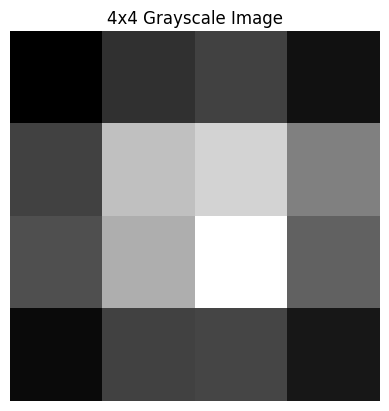

In [3]:
plt.imshow(img_array, cmap='gray')
plt.title("4x4 Grayscale Image")
plt.axis('off')
plt.show()

In [4]:
binary_img = (img_array > 127).astype(int)

In [5]:
binary_vec = binary_img.flatten() 

In [6]:
dev = qml.device("default.qubit", wires=16)

In [7]:
@qml.qnode(dev)
def basis_encoded_image(bits):
    qml.BasisState(bits, wires=range(16))
    return qml.state()

In [8]:
quantum_state = basis_encoded_image(binary_vec)

In [9]:
print("Quantum state shape:", quantum_state.shape)
print("Quantum state (non-zero amplitude):")

Quantum state shape: (65536,)
Quantum state (non-zero amplitude):


In [10]:
nonzero_index = np.argmax(np.abs(quantum_state))
print(f"Index: {nonzero_index}, Amplitude: {quantum_state[nonzero_index]}")

Index: 32, Amplitude: (1+0j)
